In [1]:
import jax.numpy.linalg as jl
import jax.numpy as jnp
import jax

from chex import Array, Scalar

key = jax.random.PRNGKey(43)

# Spectral Radius Normalization

In [2]:
key, key_1 = jax.random.split(key)
A = jax.random.normal(key, (4, 4))
A = (10 * A)
A

Array([[ 21.857025  ,   2.738361  ,   2.1990077 ,  -8.940483  ],
       [ -0.38312685,  17.985937  , -17.386469  , -19.601006  ],
       [-15.006845  ,  -0.74117565,  -8.568738  ,  13.229336  ],
       [ -2.5136046 ,  10.45492   ,  -4.7046423 ,   7.8344393 ]],      dtype=float32)

In [3]:
@jax.jit
def spectral_radius(matrix: Array) -> Scalar:
    return jnp.absolute(jnp.max(jl.eig(matrix)[0]))

In [4]:
@jax.jit
def normalize_to_spectral_radius(matrix: Array, new_radius: Scalar = 1.0) -> Array:
    return matrix / spectral_radius(matrix) * new_radius

In [5]:
A_norm = normalize_to_spectral_radius(A, new_radius=0.5)
display(A_norm)
spectral_radius(A_norm)

Array([[ 0.566436  ,  0.07096602,  0.05698841, -0.23169719],
       [-0.00992893,  0.46611476, -0.45057923, -0.5079701 ],
       [-0.38891008, -0.01920795, -0.22206323,  0.342845  ],
       [-0.06514135,  0.2709446 , -0.12192321,  0.20303349]],      dtype=float32)

Array(0.49999997, dtype=float32)

# Ridge Regression

In [6]:
import matplotlib.pyplot as plt
import numpy as np

## Input data

In [7]:
key, key_2, key_3 = jax.random.split(key, 3)

# Define the latent transformation (to be discovered)
# 2D -> 1D
W_latent = jnp.array([
    [2.1, 3.7]
])
noise = 1.0
n_samples = 10000
split_ratio = 0.8

# Define the data
X = jax.random.normal(key_2, shape=(2, n_samples))
Y = jnp.squeeze(W_latent @ X)
Y += noise * jax.random.normal(key_3, Y.shape)

# Split to train/test
split = int(split_ratio * n_samples)
X_train, X_test = X[:, :split], X[:, split:]
Y_train, Y_test = Y[:split], Y[split:]

# Shapes
print(f"X train-test shapes: {X_train.shape}-{X_test.shape}")
print(f"Y train-test shapes: {Y_train.shape}-{Y_test.shape}")

X train-test shapes: (2, 8000)-(2, 2000)
Y train-test shapes: (8000,)-(2000,)


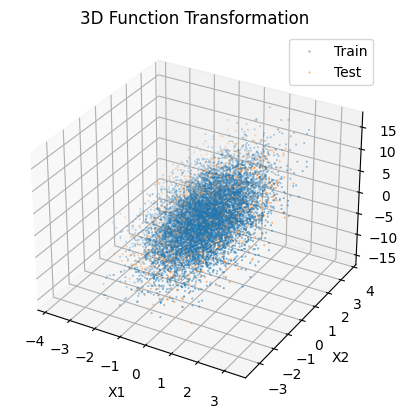

In [8]:
# Create the figure and axes
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the data
ax.scatter(X_train[0], X_train[1], Y_train, s=0.1, label="Train")
ax.scatter(X_test[0], X_test[1], Y_test, s=0.1, label="Test")

# Add a title and labels to the axes
ax.set_title('3D Function Transformation')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
ax.legend()

# Show the plot
plt.show()

## Regression

In [13]:
@jax.jit
def ridge_weights(x_batch: Array, y_batch: Array, l2: Scalar = 0.) -> Array:
    return y_batch @ x_batch.T @ jl.inv((x_batch @ x_batch.T + l2 * jnp.identity(x_batch.shape[0])))

In [14]:
W_discovered = ridge_weights(X_train, jnp.expand_dims(Y_train, axis=0))

## Prediction

In [15]:
Y_pred = jnp.squeeze(W_discovered @ X_test)

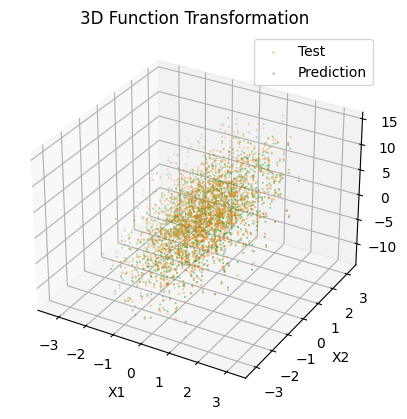

In [16]:
# Create the figure and axes
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the data
ax.scatter(X_test[0], X_test[1], Y_test, s=0.1, label="Test", color="tab:orange")
ax.scatter(X_test[0], X_test[1], Y_pred, s=0.1, label="Prediction", color="tab:green")

# Add a title and labels to the axes
ax.set_title('3D Function Transformation')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
ax.legend()

# Show the plot
plt.show()